<a href="TAIL"><img src="https://i.imgur.com/GRTE0OG.png" width="150" title="Tail Logo" /></a>

# <font color ="#00b8ff"> Detecção de Tumores Cerebrais </font>

##  <font color ="#00b8ff"> 1 - Importação dos dados </font>
É necessário importar as imagens do cérebro em que os tumores estão presentes. O conjunto de dados pode ser dividido em conjuntos de treinamento, validação e teste.

In [13]:
import cv2
import numpy as np
import os
import tensorflow as tf
import keras
from keras import preprocessing
import matplotlib.pyplot as plt


In [1]:
from io import BytesIO
import requests
import zipfile

url = "https://github.com/Franky03/Images/blob/main/archive%20(1).zip?raw=true"

response = requests.get(url)
print(response)
imgs_zip = BytesIO(response.content)

with zipfile.ZipFile(imgs_zip) as imgs:
  imgs.extractall('./')


<Response [200]>


##  <font color ="#00b8ff"> 2 - Pré-processamento de dados </font>
O pré-processamento pode incluir o redimensionamento das imagens, normalização, filtragem e eliminação de ruído para preparar as imagens para o treinamento do modelo.



In [15]:
def preprocess_image(image):
  image = tf.cast(image, tf.float32)
  image /= 255.0 #Normalização
  return image

In [16]:
def load_dataset(folder, label):
  images = []
  for filename in os.listdir(folder):
    img_path = os.path.join(folder, filename)
    img = tf.keras.preprocessing.image.load_img(img_path, target_size= (200, 200))
    img_array = tf.keras.preprocessing.image.img_to_array(img)

    images.append(preprocess_image(img_array))

  labels = [label] * len(images)
  return tf.data.Dataset.from_tensor_slices((images, labels))


In [17]:
true_dataset = load_dataset("./brain_tumor_dataset/yes", 1)
false_dataset = load_dataset("./brain_tumor_dataset/no", 0)

train_dataset = true_dataset.concatenate(false_dataset)
train_dataset = train_dataset.shuffle(buffer_size=len(train_dataset)).batch(batch_size=32)

for image_batch, label_batch in train_dataset.take(1):
  print("x_train shape:", image_batch.shape)
  print("y_train shape:", label_batch.shape)

x_train shape: (32, 200, 200, 3)
y_train shape: (32,)


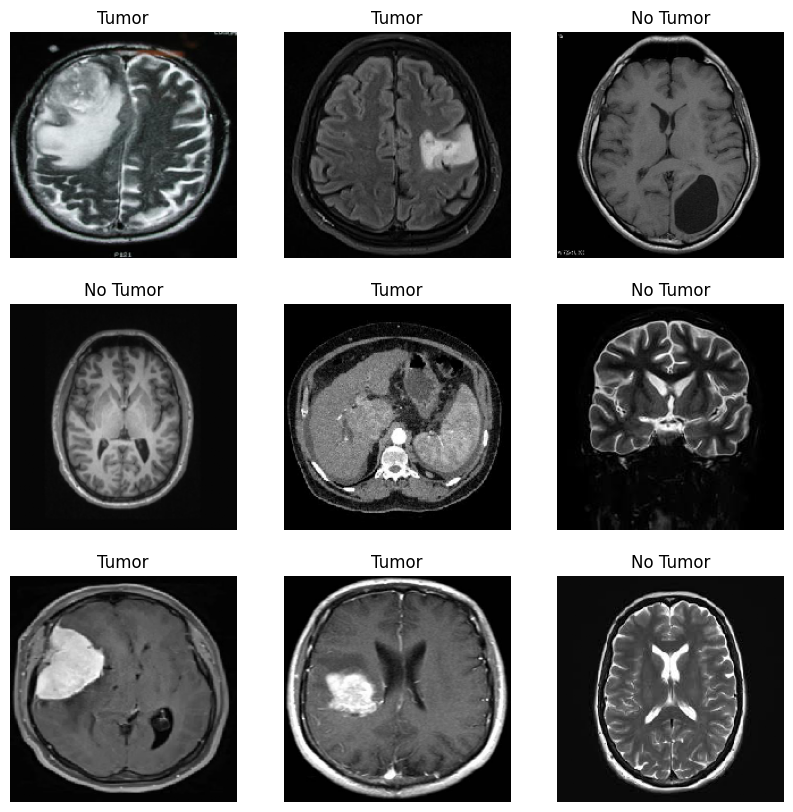

In [18]:
class_names = ["No Tumor", "Tumor"]

def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(9):
    ax = plt.subplot(3,3,n+1)
    plt.imshow(image_batch[n])
    plt.title(class_names[int(label_batch[n])])
    plt.axis('off')
  plt.show()

for image_batch, label_batch in train_dataset.take(1):
    show_batch(image_batch, label_batch)

##  <font color ="#00b8ff"> 3 - Data Augmentation </font>

Como o conjunto de dados pode ser pequeno, a técnica de aumento de dados pode ser usada para gerar imagens adicionais de treinamento, aumentando assim a variedade dos dados de treinamento. Algumas técnicas de aumento de dados que podem ser usadas incluem rotação, translação, zoom, espelhamento, mudança de brilho e contraste.

## <font color ="#00b8ff"> 4 - Criação do modelo </font>
Para a criação do modelo de visão computacional, pode-se utilizar uma arquitetura de rede neural convolucional (CNN). As CNNs são conhecidas por sua eficácia em tarefas de visão computacional, como detecção de objetos e classificação de imagens.

## <font color ="#00b8ff"> 5 - Treinamento do modelo </font>
 
O modelo pode ser treinado usando o conjunto de dados de treinamento e validação usando uma função de perda adequada para otimizar o modelo. É importante monitorar a precisão do modelo durante o treinamento para garantir que ele esteja melhorando.

##  <font color ="#00b8ff"> 6 - Avaliação do modelo </font>
Após o treinamento, o modelo pode ser avaliado usando o conjunto de dados de teste para verificar a eficácia da detecção de tumores. É importante avaliar o desempenho do modelo usando métricas como precisão, recall e F1-score.

##  <font color ="#00b8ff"> 7 - Ajuste do modelo </font>
Se o desempenho do modelo não for satisfatório, o modelo pode ser ajustado com ajustes em sua arquitetura, hiperparâmetros ou técnicas de pré-processamento.